In [1]:
#Importamos la librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('datasets/dataset_filtrado.csv')

# Obtuvimos la totalidad de registros por columnas

In [3]:
#registros por columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86891 entries, 0 to 86890
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Atributo Potencia                74332 non-null  object 
 1   Atributo Largo                   75085 non-null  object 
 2   Atributo Cilindrada              75144 non-null  object 
 3   Atributo Capacidad de personas   75471 non-null  float64
 4   Atributo Control de tracción     77992 non-null  object 
 5   Atributo Motor                   78232 non-null  object 
 6   Atributo Transmisión             79204 non-null  object 
 7   Latitud                          86285 non-null  float64
 8   Longitud                         86285 non-null  float64
 9   Link Miniatura                   86548 non-null  object 
 10  Registro Vendedor                86891 non-null  object 
 11  Link Vendedor                    86891 non-null  object 
 12  Atributo Versión  

# Analizamos el tipo de dato de cada columna

In [4]:
#Analizamos el tipo de dato
df.dtypes

Atributo Potencia                   object
Atributo Largo                      object
Atributo Cilindrada                 object
Atributo Capacidad de personas     float64
Atributo Control de tracción        object
Atributo Motor                      object
Atributo Transmisión                object
Latitud                            float64
Longitud                           float64
Link Miniatura                      object
Registro Vendedor                   object
Link Vendedor                       object
Atributo Versión                    object
Atributo Año                         int64
Atributo Modelo                     object
Atributo Kilómetros                 object
Atributo Tipo de combustible        object
Atributo Puertas                     int64
Atributo Marca                      object
ID                                  object
Atributo Condición del ítem         object
Cantidad Disponible                  int64
ID Vendedor                          int64
Vendedor de

# Listamos los nombres de las columnas

In [6]:
#Seleccionamos todas las columnas
df.columns

Index(['Atributo Potencia', 'Atributo Largo', 'Atributo Cilindrada',
       'Atributo Capacidad de personas', 'Atributo Control de tracción',
       'Atributo Motor', 'Atributo Transmisión', 'Latitud', 'Longitud',
       'Link Miniatura', 'Registro Vendedor', 'Link Vendedor',
       'Atributo Versión', 'Atributo Año', 'Atributo Modelo',
       'Atributo Kilómetros', 'Atributo Tipo de combustible',
       'Atributo Puertas', 'Atributo Marca', 'ID',
       'Atributo Condición del ítem', 'Cantidad Disponible', 'ID Vendedor',
       'Vendedor de Autos', 'Agencia Inmobiliaria',
       'Transacciones Totales Vendedor', 'Valoraciones Positivas Vendedor',
       'Valoraciones Negativas Vendedor', 'Valoraciones Neutrales Vendedor',
       'Precio', 'Moneda', 'Unidades Vendidas', 'Ciudad Vendedor',
       'Tipo de Publicación', 'Fecha Finalización', 'Condición', 'Link',
       'Acepta MercadoPago', 'Estado', 'Ciudad', 'País Vendedor', 'Titulo',
       'Estado Vendedor', 'Precio USD', 'Kilómetros

**Resolución**: Machine Learning - Modelo de Clasificación 

# Separamos los features en X e y

In [10]:
columnas_analisis = ['Atributo Capacidad de personas', 'Atributo Control de tracción', 'Atributo Transmisión', 'Latitud', 'Longitud',
       'Link Miniatura', 'Registro Vendedor', 'Link Vendedor',
       'Atributo Versión', 'Atributo Año', 'Atributo Modelo',
       'Atributo Kilómetros', 'Atributo Tipo de combustible',
       'Atributo Puertas', 'Atributo Marca', 'ID',
       'Atributo Condición del ítem', 'Cantidad Disponible', 'ID Vendedor',
       'Vendedor de Autos', 'Agencia Inmobiliaria',
       'Transacciones Totales Vendedor', 'Valoraciones Positivas Vendedor',
       'Valoraciones Negativas Vendedor', 'Valoraciones Neutrales Vendedor',
       'Precio', 'Moneda', 'Unidades Vendidas', 'Ciudad Vendedor',
       'Tipo de Publicación', 'Fecha Finalización', 'Condición', 'Link',
       'Acepta MercadoPago', 'Estado', 'Ciudad', 'País Vendedor', 'Titulo',
       'Estado Vendedor', 'Precio USD', 'Kilómetros']

In [172]:
# Para generar un modelo de clasificación, convertimos la columna precio en un rango de precios

def rango_precio(row):
    if row['Precio USD'] < 8000:
        return 1
    elif row['Precio USD'] < 13000:
        return 2
    elif row['Precio USD'] < 19000:
        return 3
    elif row['Precio USD'] > 19000:
        return 4


In [173]:
df['Rango'] = df.apply(rango_precio, axis=1)

In [174]:
df['Rango'].value_counts().sort_index()

1.0    20421
2.0    22465
3.0    21327
4.0    22144
Name: Rango, dtype: int64

In [176]:
columnas_analisis = ['Atributo Capacidad de personas', 'Atributo Transmisión',
                     'Atributo Año', 'Atributo Tipo de combustible',
       'Atributo Puertas', 'Marca','Atributo Condición del ítem','Vendedor de Autos',
                     'Transacciones Totales Vendedor', 'Moneda',
       'Tipo de Publicación', 'Estado', 'Kilómetros', 'Rango']

In [177]:
def corrector_marcas(row):
    return row['Atributo Marca'].split(' ')[0]

In [178]:
df_columnas_filtradas = df
df_columnas_filtradas['Marca'] = df_columnas_filtradas.apply(corrector_marcas, axis=1)
df_columnas_filtradas = df[columnas_analisis]

In [179]:
columnas_dummies = ['Atributo Transmisión', 'Atributo Tipo de combustible', 'Marca', 'Atributo Condición del ítem', 'Vendedor de Autos', 'Moneda', 'Tipo de Publicación', 'Estado']

In [180]:
df_columnas_filtradas = df_columnas_filtradas.loc[df_columnas_filtradas['Marca'].isin(['Volkswagen', 'Ford', 'Peugeot', 'Renault', 'Chevrolet', 'Fiat',
       'Toyota', 'Citroën', 'Honda', 'Mercedes-Benz', 'Nissan', 'Jeep', 'Audi',
       'BMW', 'Hyundai', 'Chery', 'Kia', 'Suzuki', 'Dodge', 'Mitsubishi',
       'Chrysler', 'Alfa', 'DS', 'Porsche', 'Mini', 'Iveco', 'Volvo', 'SEAT',
       'Land', 'Lifan'])]

In [181]:
df_analisis = pd.get_dummies(df_columnas_filtradas, columns=columnas_dummies)

In [182]:
df_sin_na = df_analisis.dropna()

In [183]:
#Separamos los datos de entrada de la salida
y = df_sin_na['Rango'] #Elimino de mi dataset la variable a predecir
x = df_sin_na.drop(columns=["Rango"])#Defino el Target
x.columns

Index(['Atributo Capacidad de personas', 'Atributo Año', 'Atributo Puertas',
       'Transacciones Totales Vendedor', 'Kilómetros',
       'Atributo Transmisión_Automática',
       'Atributo Transmisión_Automática secuencial',
       'Atributo Transmisión_Manual', 'Atributo Transmisión_No Informa',
       'Atributo Transmisión_Semiautomática',
       'Atributo Tipo de combustible_Diésel',
       'Atributo Tipo de combustible_Eléctrico',
       'Atributo Tipo de combustible_GNC',
       'Atributo Tipo de combustible_Híbrido',
       'Atributo Tipo de combustible_Híbrido/Diesel',
       'Atributo Tipo de combustible_Híbrido/Nafta',
       'Atributo Tipo de combustible_Manual',
       'Atributo Tipo de combustible_Nafta',
       'Atributo Tipo de combustible_Nafta/GNC',
       'Atributo Tipo de combustible_No informa', 'Marca_Alfa', 'Marca_Audi',
       'Marca_BMW', 'Marca_Chery', 'Marca_Chevrolet', 'Marca_Chrysler',
       'Marca_Citroën', 'Marca_DS', 'Marca_Dodge', 'Marca_Fiat', 'Marca_

# Separaramos los datos en Train (70 %) y Test (30 %) con un random_state=42.

In [184]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

In [185]:
#Me quedo con 30% para test y 70% para train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

# Creamos un objeto de Árbol de Decisión para un modelo de clasificación, con un Nivel de Profundidad = 2 y una Semilla para la reproducibilidad = 42

In [186]:
#Importamos el modelo
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 13)


# Entrenamos el modelo creado

In [187]:
#Entrenamos el modelo
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13)

# Realizamos la predicción del modelo en Train y Test

In [188]:
#Prediccion en Train
y_pred_train = clf.predict(x_train)
#Prediccion en Test
y_pred_test = clf.predict(x_test)

# Calculamos la métrica de Accuracy en Train y Test 

In [189]:
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
#Calculo el accuracy en Test
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

print("Accuracy sobre test:", acc_test)

print("Accuracy sobre train:",acc_train)

Accuracy sobre test: 0.7113023214125661
Accuracy sobre train: 0.7645296354626819


 ¿Qué interpretamos de nuestro árbol de decisión?

Nuestro modelo está realizando una clasificación con una Accuracy que está levemente por sobre el 70%, por lo que aunque puede resultar muy útil, aunque es necesario optimizarlo aún más para mejorar este valor.


Por otra parte, aunque  la Accuracy sobre el test y el train son muy similares, la Accuracy sobre train es 4% más alta que sobre respecto a test, por lo tanto, es posible que exista algo de overfitting.

# Graficamos las variables de importancia del Árbol de Decisión 

In [190]:
import matplotlib.pylab as plt


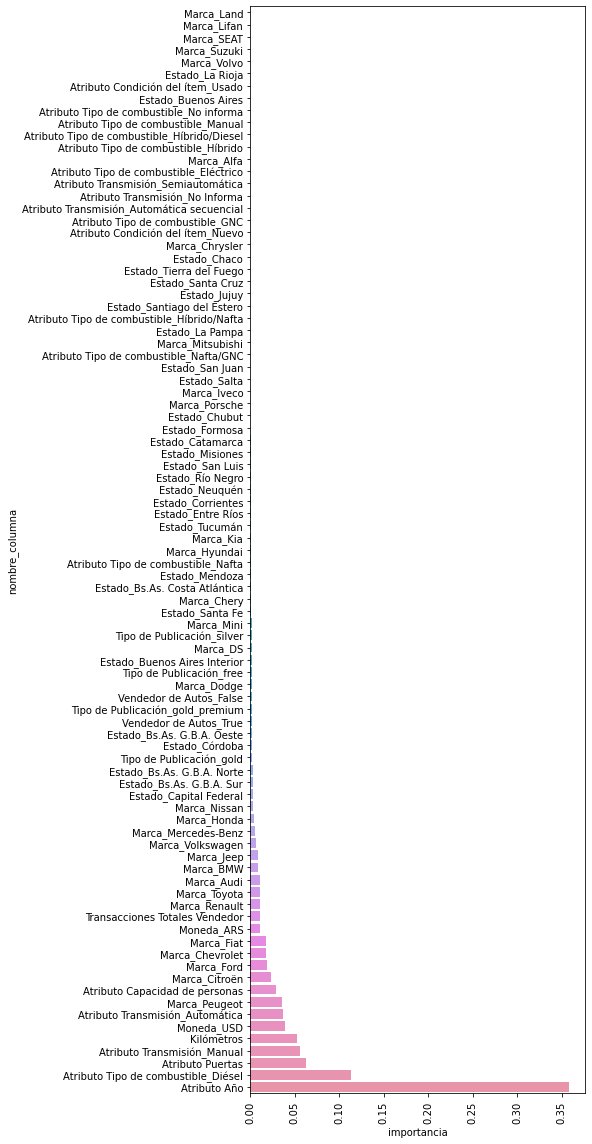

In [191]:
#Importancia de las variablescolumnas_dataset = X_train.columns
plt.rcParams["figure.figsize"] = [6, 20]
importancias_clf =  clf.feature_importances_
df_importancias = pd.DataFrame({"nombre_columna":x.columns, "importancia":importancias_clf})
df_importancias = df_importancias.sort_values("importancia")
plot = sns.barplot(data = df_importancias , y="nombre_columna", x="importancia")
plt.xticks(rotation=90)

plt.show()

# Conclusión

Con la figura anterior podemos ver que la variable que más pesa sobre el rango de valor al que pertenece un vehículo es el año, seguido con cierta distancia por el tipo de combustible (si es Diesel) y la transmisión (si es automática) y así sucesivamente. También podemos ver que hay muchos atributos que no son relevantes para esta clasificación.

Finalmente, los resultados obtenidos aquí nos guían sobre las optimizaciones que necesitamos realizar en el futuro para mejorar nuestra predicción.